In [2]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [3]:
# PostgreSQL connection details
postgres_user = 'postgres'
postgres_password = ''
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'football'

# Create a PostgreSQL connection using SQLAlchemy
postgres_uri = f'postgresql://{postgres_user}:{postgres_password}@{postgres_host}:{postgres_port}/{postgres_db}'
engine = create_engine(postgres_uri)

# Define table name (adjust if necessary)
table_name = 'man_city_shots_normalized_with_match_id'

# Read the table into a Pandas DataFrame
df = pd.read_sql_table(table_name, engine)

# Check the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())
print(df.info())

         Date           Time            Comp        Round  Day Venue Result  \
0  2023-08-11  20:00 (00:45)  Premier League  Matchweek 1  Fri  Away      W   
1  2023-08-19  20:00 (00:45)  Premier League  Matchweek 2  Sat  Home      W   
2  2023-08-27  14:00 (18:45)  Premier League  Matchweek 3  Sun  Away      W   
3  2023-09-02  15:00 (19:45)  Premier League  Matchweek 4  Sat  Home      W   
4  2023-09-16  15:00 (19:45)  Premier League  Matchweek 5  Sat  Away      W   

   Goals For  Goals Against       Opponent  ...  Shot Distance  Free Kicks  \
0          3              0        Burnley  ...       0.537190         0.0   
1          1              0  Newcastle Utd  ...       0.867769         0.0   
2          2              1  Sheffield Utd  ...       0.818182         1.0   
3          5              1         Fulham  ...       0.611570         0.0   
4          3              1       West Ham  ...       0.743802         0.5   

   Penalty Goals  Penalty Attempts  Expected Goals  Non-

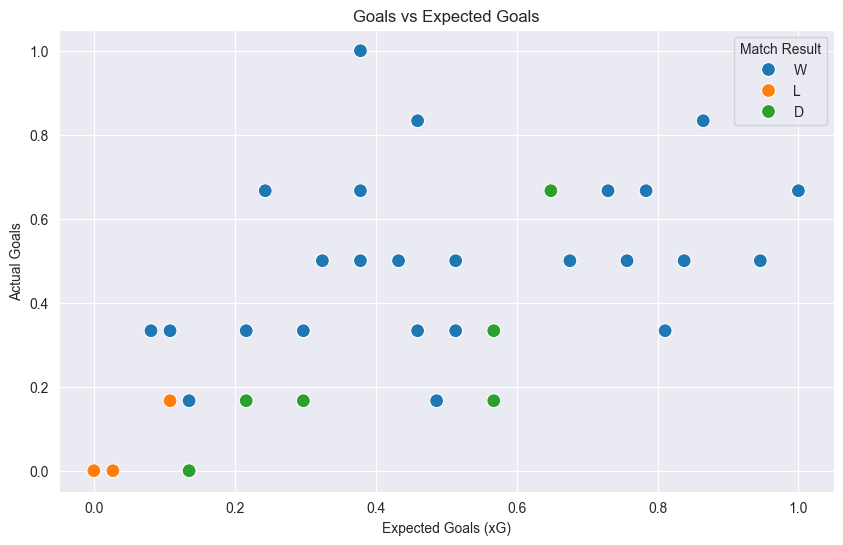

In [6]:
# Visualization 1: Goals vs Expected Goals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Expected Goals", y="Goals", hue="Result", s=100)
plt.title("Goals vs Expected Goals")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Actual Goals")
plt.legend(title="Match Result")
plt.grid(True)
plt.show()

C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\4020807766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Venue", y="SoT%", palette="coolwarm")


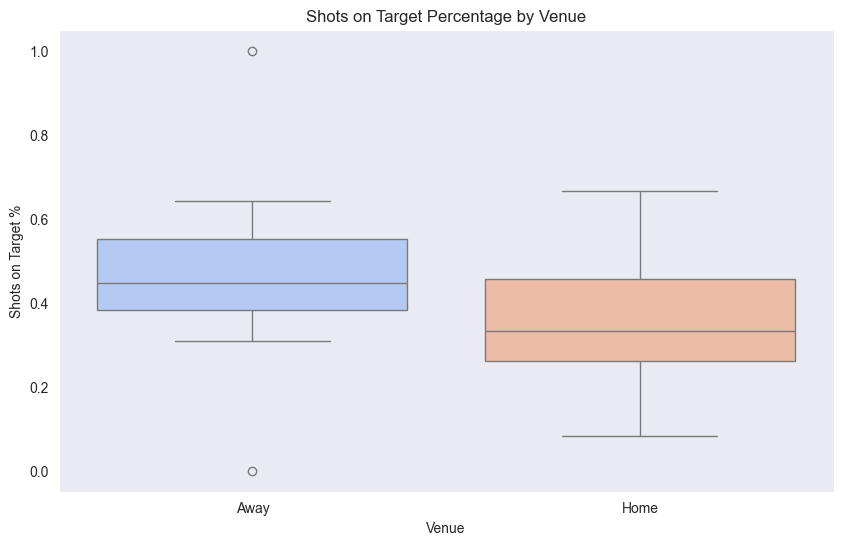

In [7]:

# Visualization 2: Shot Accuracy (Shots on Target %)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Venue", y="SoT%", palette="coolwarm")
plt.title("Shots on Target Percentage by Venue")
plt.xlabel("Venue")
plt.ylabel("Shots on Target %")
plt.grid(axis="y")
plt.show()

C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\2634652397.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Goals For", hue="Result", ci=None)


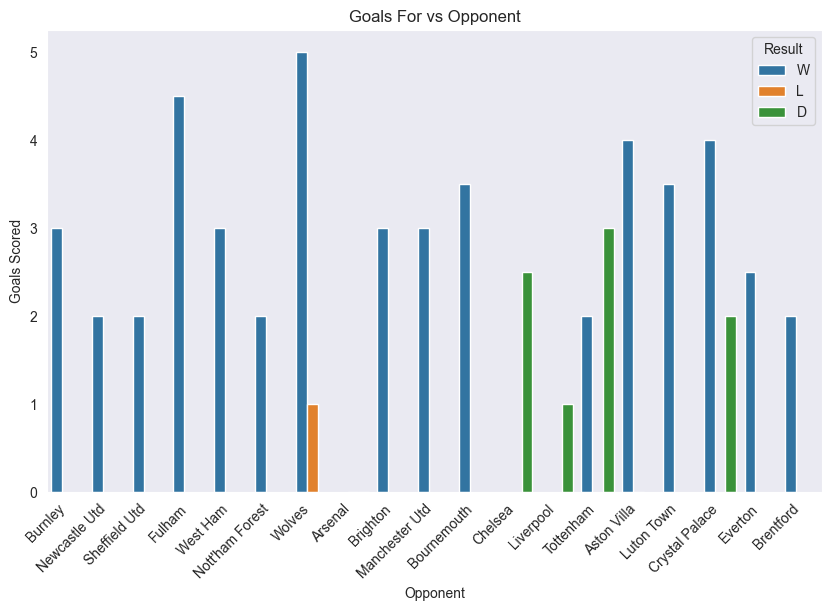

In [8]:
# Visualization 3: Goals For vs Goals Against
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Opponent", y="Goals For", hue="Result", ci=None)
plt.xticks(rotation=45, ha="right")
plt.title("Goals For vs Opponent")
plt.xlabel("Opponent")
plt.ylabel("Goals Scored")
plt.legend(title="Result")
plt.grid(axis="y")
plt.show()

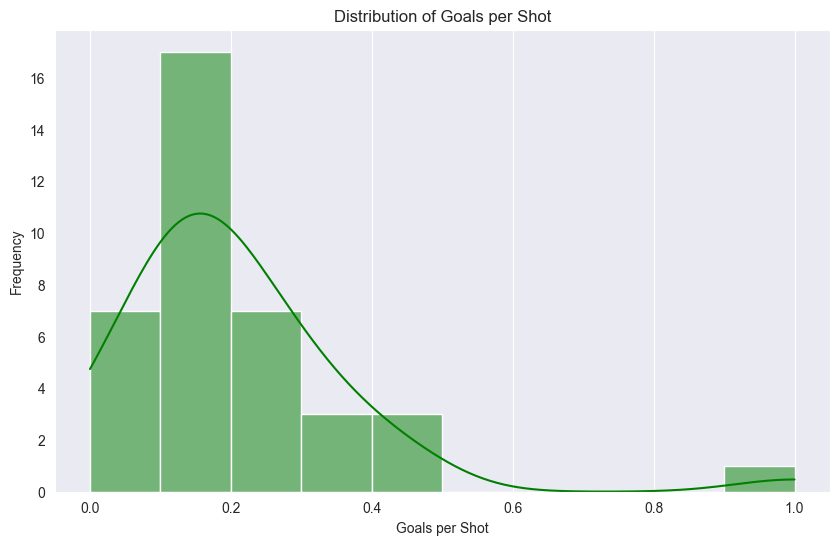

In [9]:
# Visualization 4: Goals per Shot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Goals per Shot", kde=True, bins=10, color="green")
plt.title("Distribution of Goals per Shot")
plt.xlabel("Goals per Shot")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\2791887386.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Penalty Success Rate", ci=None, palette="viridis")
C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\2791887386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Penalty Success Rate", ci=None, palette="viridis")


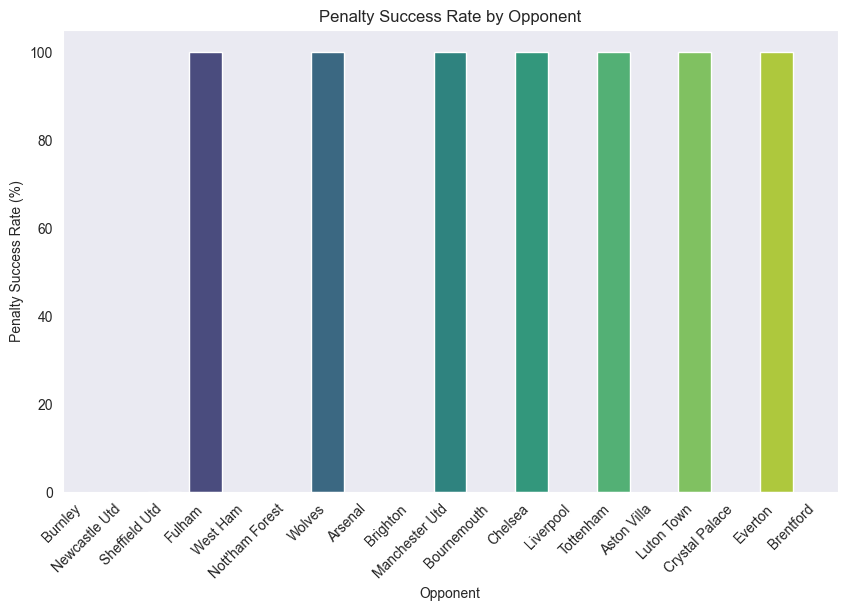

In [10]:
# Visualization 5: Penalty Analysis
plt.figure(figsize=(10, 6))
df["Penalty Success Rate"] = (df["Penalty Goals"] / df["Penalty Attempts"]) * 100
sns.barplot(data=df, x="Opponent", y="Penalty Success Rate", ci=None, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Penalty Success Rate by Opponent")
plt.xlabel("Opponent")
plt.ylabel("Penalty Success Rate (%)")
plt.grid(axis="y")
plt.show()

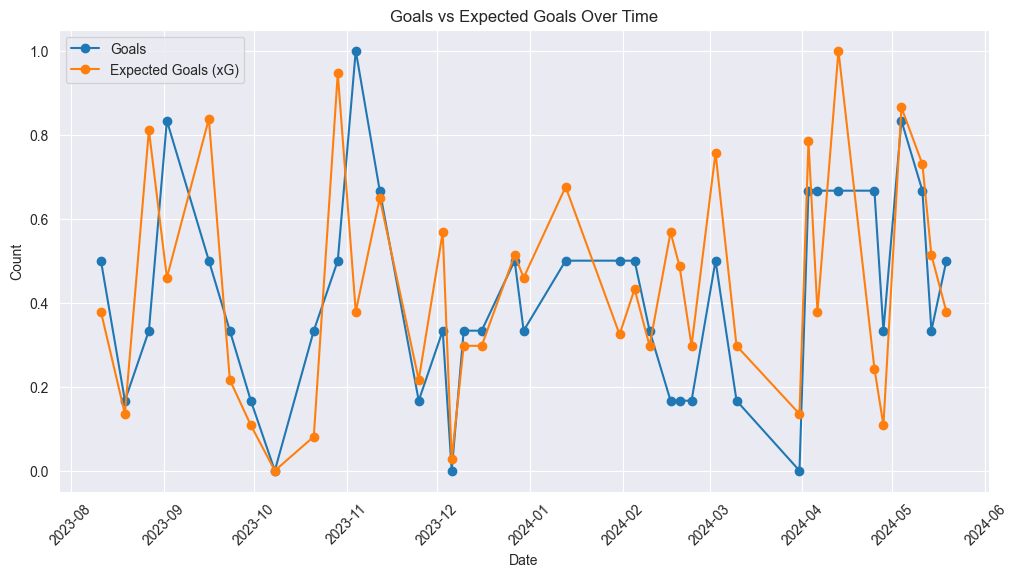

In [11]:
# Convert 'Date' to datetime format for proper sorting
df['Date'] = pd.to_datetime(df['Date'])

# Line plot of Goals and Expected Goals over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Goals'], label='Goals', marker='o')
plt.plot(df['Date'], df['Expected Goals'], label='Expected Goals (xG)', marker='o')
plt.title("Goals vs Expected Goals Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


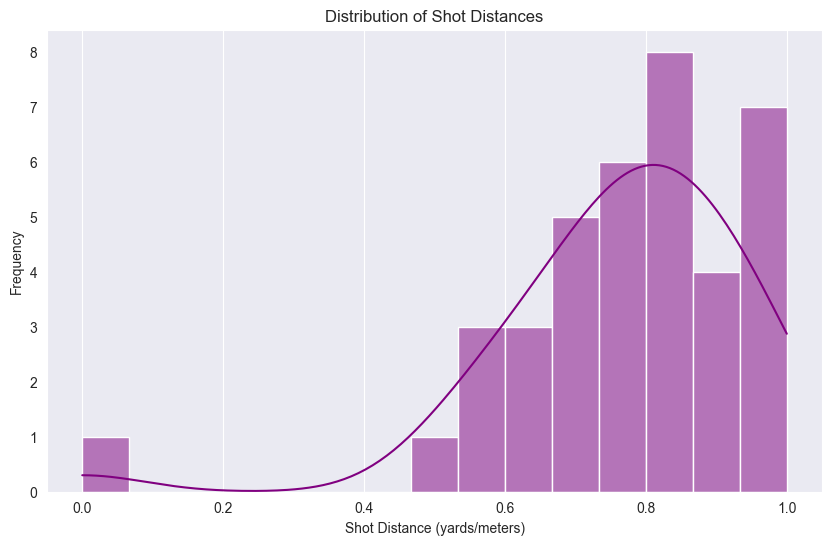

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Shot Distance", kde=True, color="purple", bins=15)
plt.title("Distribution of Shot Distances")
plt.xlabel("Shot Distance (yards/meters)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()


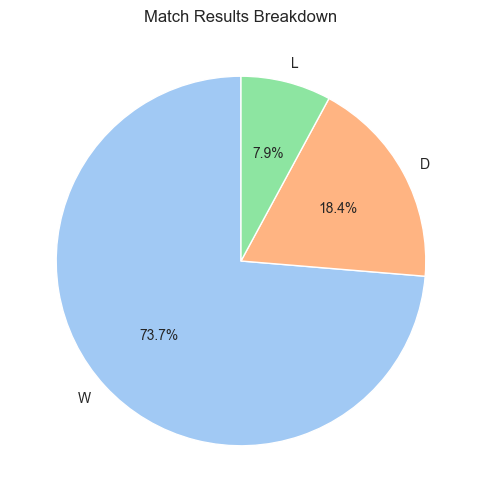

In [13]:
plt.figure(figsize=(8, 6))
df['Result'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Match Results Breakdown")
plt.ylabel("")  # Remove the y-axis label for clarity
plt.show()


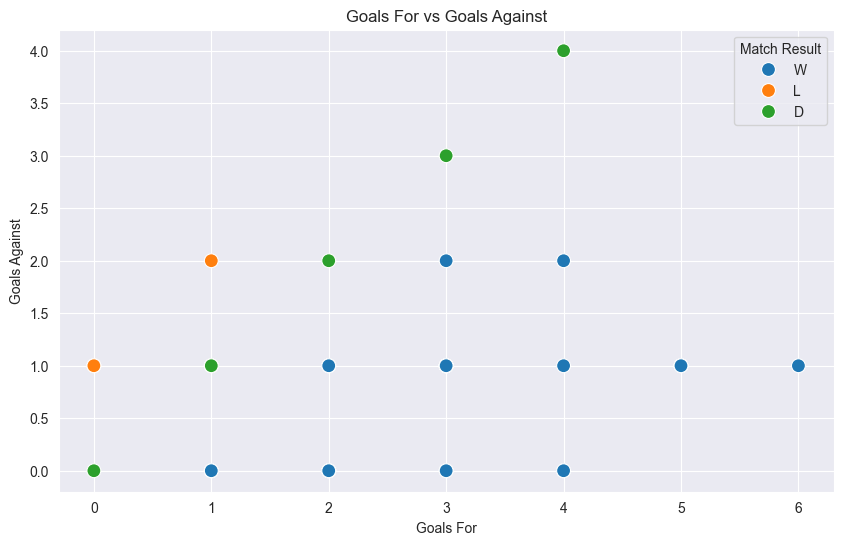

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Goals For", y="Goals Against", hue="Result", s=100)
plt.title("Goals For vs Goals Against")
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.legend(title="Match Result")
plt.grid(True)
plt.show()


C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\1261439068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Venue", y="G-xG", palette="coolwarm")


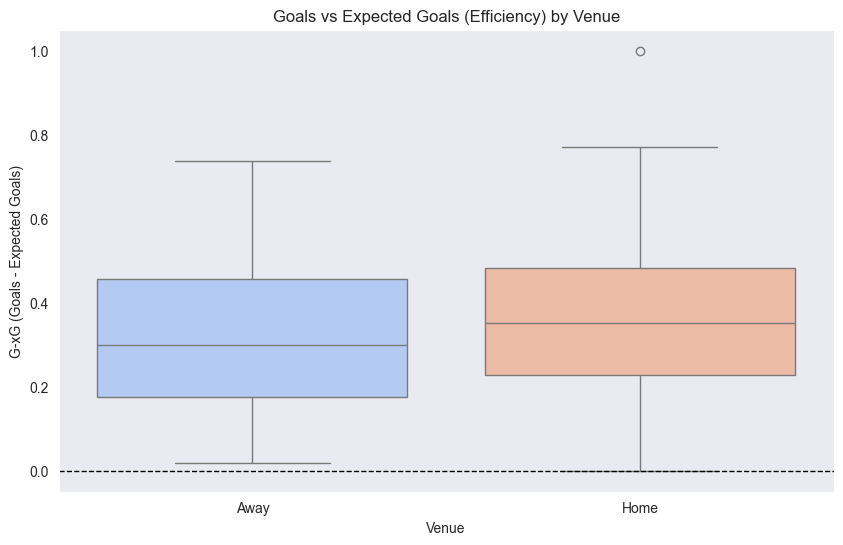

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Venue", y="G-xG", palette="coolwarm")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Goals vs Expected Goals (Efficiency) by Venue")
plt.xlabel("Venue")
plt.ylabel("G-xG (Goals - Expected Goals)")
plt.grid(axis="y")
plt.show()


C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\2249417406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Venue", y="Non-Penalty xG", inner="quartile", palette="muted")


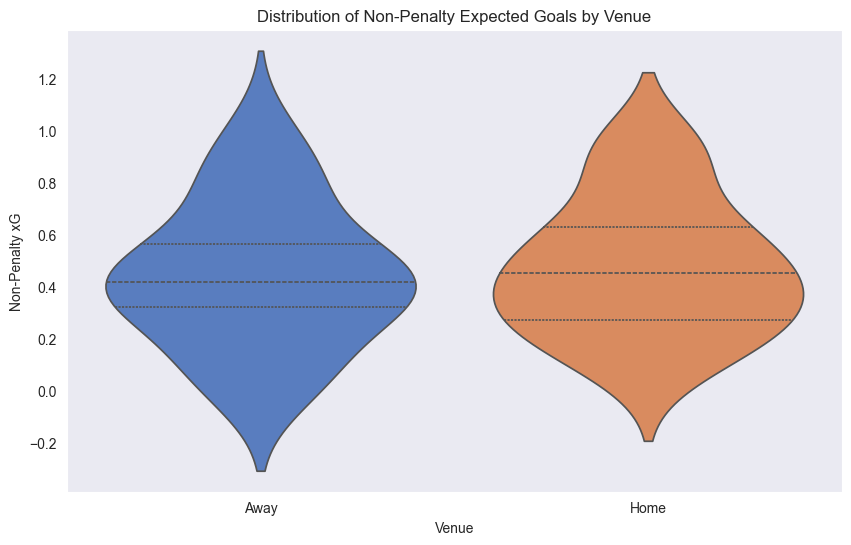

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Venue", y="Non-Penalty xG", inner="quartile", palette="muted")
plt.title("Distribution of Non-Penalty Expected Goals by Venue")
plt.xlabel("Venue")
plt.ylabel("Non-Penalty xG")
plt.grid(axis="y")
plt.show()


C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\3874401870.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Expected Goals", ci=None, palette="viridis")
C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\3874401870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Expected Goals", ci=None, palette="viridis")


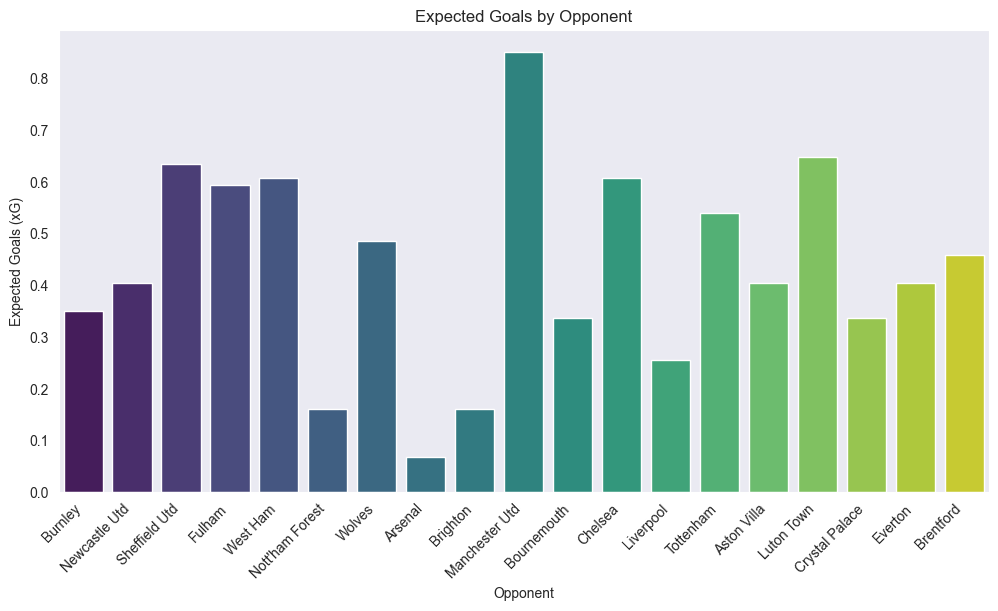

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Opponent", y="Expected Goals", ci=None, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Expected Goals by Opponent")
plt.xlabel("Opponent")
plt.ylabel("Expected Goals (xG)")
plt.grid(axis="y")
plt.show()


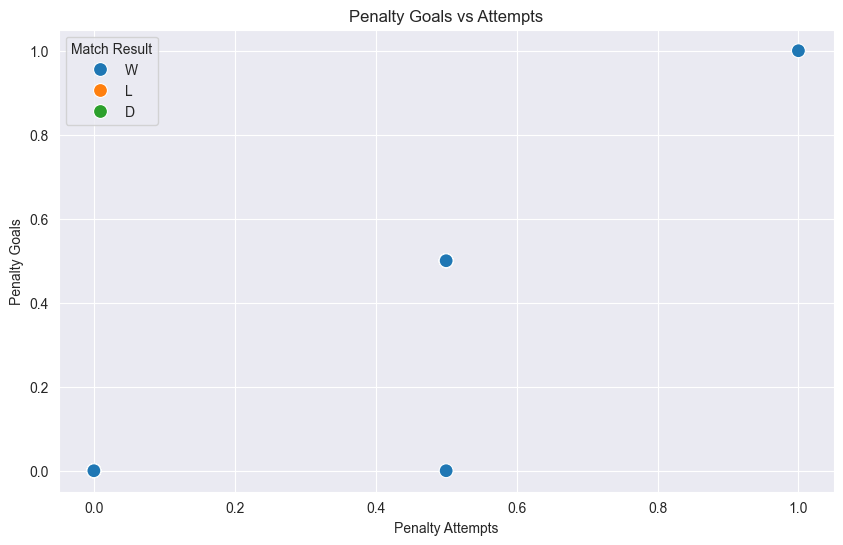

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Penalty Attempts", y="Penalty Goals", hue="Result", s=100)
plt.title("Penalty Goals vs Attempts")
plt.xlabel("Penalty Attempts")
plt.ylabel("Penalty Goals")
plt.legend(title="Match Result")
plt.grid(True)
plt.show()


C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\3811437575.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Goals per Shot", ci=None, palette="coolwarm")
C:\Users\khadk\AppData\Local\Temp\ipykernel_19280\3811437575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Opponent", y="Goals per Shot", ci=None, palette="coolwarm")


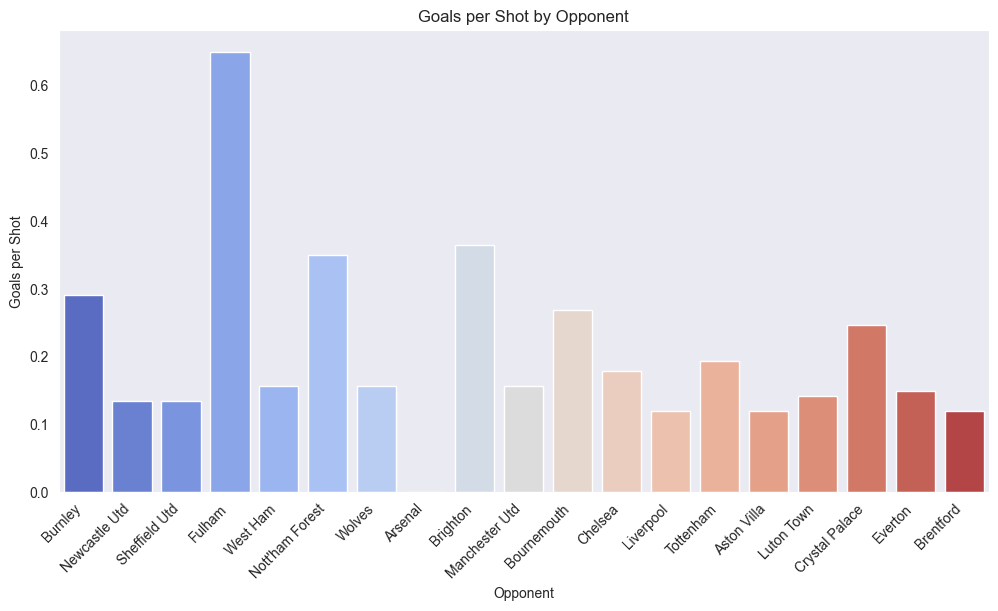

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Opponent", y="Goals per Shot", ci=None, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Goals per Shot by Opponent")
plt.xlabel("Opponent")
plt.ylabel("Goals per Shot")
plt.grid(axis="y")
plt.show()


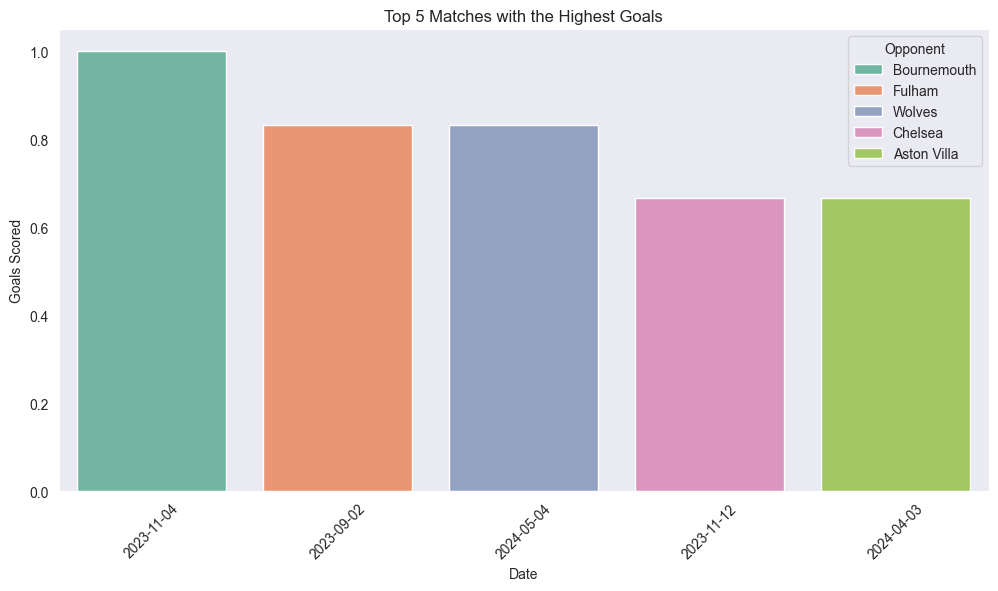

In [20]:
top_matches = df.nlargest(5, 'Goals')  # Change 'Goals' to 'Expected Goals' for xG
plt.figure(figsize=(12, 6))
sns.barplot(data=top_matches, x="Date", y="Goals", hue="Opponent", palette="Set2")
plt.title("Top 5 Matches with the Highest Goals")
plt.xlabel("Date")
plt.ylabel("Goals Scored")
plt.xticks(rotation=45)
plt.legend(title="Opponent")
plt.grid(axis="y")
plt.show()
